# **Ex3**

## Names and IDs

1.   209969245
2.   212112106

## 1. Fuel efficiency price prediction (35 points)
In this section we will use regression tree model for predicting the fuel efficiency for different cars


The features data available here:
https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv

The labels are here:
https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv


In [555]:
#import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
#import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
# load the data
import pandas as pd
from sklearn.impute import SimpleImputer
!pip install shap
import shap

from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
import numpy as np
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import UndefinedMetricWarning
y = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv')
X = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv')


### EDA visuallization (5pts)

Explore the data. What features are meaningful? what are the correlated features? display statistcs about the data itself including it's value ranges.

In [556]:
# EDA
# Get the size of the DataFrame
xRows, xColumns = X.shape
#yRows, yColumns = y.shape
yRows = y.shape[0]
print("Training Set DataFrame Size - Rows: " + str(len(X)) + " Columns: " + str(len(X.columns)) )
print("Test Set DataFrame Size - Rows: " + str(len(y)) + " Columns: " + str(len(y.columns)) )
print("\n")
# Check for null values
null_values_X = X.isna()
print("Features have Null Values:" + str(null_values_X))
null_values_y = y.isna()
print("Labels have Null Values:" + str(null_values_y))
    # split into categories of dataTypes
numerical_columns = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year',
                         ]
categorical_columns = ['Origin']

target_label = ['MPG']
print("First observations about the Features Dataset:   \n")
for column_name in numerical_columns:
  index = numerical_columns.index(column_name)
  print(numerical_columns[index] + ": Value Range: " + str(X[column_name].min())  +" to: " +str(X[column_name].max()))
  print( "Average Value: " + str(X[column_name].mean()) + "\n")




# Get unique values in the 'Origin' column
unique_origins = X['Origin'].unique()

print("Distinct values in the 'Origin' column:", unique_origins)
print("\n")

X.head()





Training Set DataFrame Size - Rows: 398 Columns: 7
Test Set DataFrame Size - Rows: 398 Columns: 1


Features have Null Values:     Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
0        False         False       False    True         False       False   
1        False         False       False   False         False       False   
2         True         False       False   False         False        True   
3        False         False        True    True          True       False   
4        False         False        True   False         False       False   
..         ...           ...         ...     ...           ...         ...   
393      False         False       False   False          True       False   
394      False          True       False    True         False       False   
395      False         False        True   False         False        True   
396      False         False        True   False         False       False   
397       True  

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8.0,307.0,130.0,NaN,12.0,70.0,USA
1,8.0,350.0,165.0,3693.0,11.5,70.0,USA
2,NaN,318.0,150.0,3436.0,11.0,NaN,NaN
3,8.0,304.0,NaN,NaN,NaN,70.0,NaN
4,8.0,302.0,NaN,3449.0,10.5,70.0,USA


In [557]:

print("First observations about the Label Dataset:   \n")
print(target_label[0] + ": \n Value Range: " + str(y['MPG'].min())  +" to: " +str(y['MPG'].max()))
print(" Average Value: " + str(y['MPG'].mean()))
y.head()

First observations about the Label Dataset:   

MPG: 
 Value Range: 9.0 to: 46.6
 Average Value: 23.514572864321607


,MPG
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


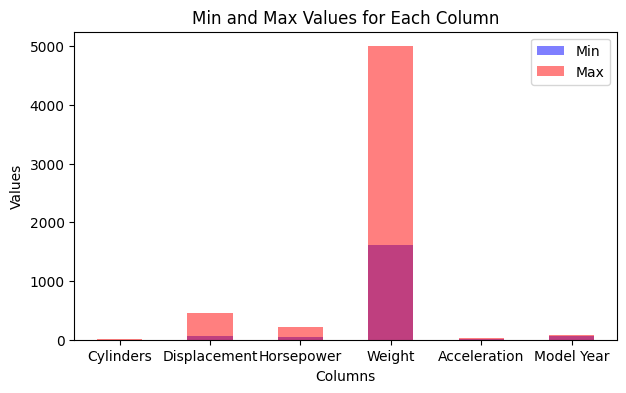

In [558]:
# Drop column 'Origin'
numerical_features_df = X.drop('Origin', axis=1, inplace=False)

# # Calculate min and max values for each column
min_values = numerical_features_df.min()
max_values = numerical_features_df.max()

# Plot bar chart
plt.figure(figsize=(7, 4))
min_values.plot(kind='bar', color='blue', alpha=0.5, label='Min')
max_values.plot(kind='bar', color='red', alpha=0.5, label='Max')
plt.title('Min and Max Values for Each Column')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=0)
plt.show()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


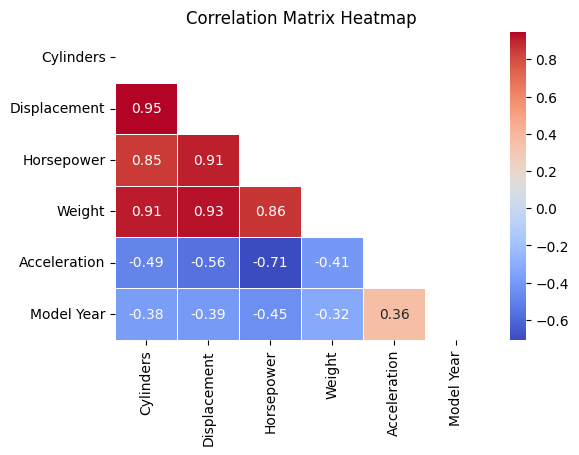

In [559]:
## Analyze Correlations between features using pandas

# # Concatenate features and target label into a single DataFrame
# df = pd.concat([X, y], axis=1)

# Calculate correlation matrix
correlation_matrix = X.corr()

# # Extract correlations between features and target label
# correlation_with_target = correlation_matrix['target']

# Display correlations
# print("Correlation with target label:")
# print(correlation_matrix)

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Plot correlation matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title("Correlation Matrix Heatmap")
plt.show()

### EDA insights (5pts)

What are you insgits based on the previuse visualization?

In [560]:
# Graph 2 -
# We have inferred some insights from our previous visualizations:
# 1) Most features have a High Correlation with each other, with the exception of Model Year and Accelaration which have less to the other remaining features.
# 2) The data is not normalized, we can see that in the Bar Plot the Weight attribute has a maximum value of almost 5000, this makes it harder to visualize our data and might compromise some calculations.
# 3) We have 1 categorical column called "origin" in the features dataset, it describes which country the car originated from, the rest are Numerical values.
# 4) The target label dataset has 1 row and numerical values between 9.0 to 46.6, they describe the Miles Per Gallon of fuel for each car.
# 5) The features dataset contain NO KEYS.
# 6) We have no null values in the Label Dataset, but we have them in the Features dataset.


### Preprocessing (5pts)

Apply preprocessing according to your data, handle missing values and split the dataset into train-test as well.
Explain the reason for all methods that you apply.

Make sure that it doesn't affect the data charateristics. Which means that the correlations stay the same (if it was not corelated before it shouldn't be now).

In [561]:
# Preprocessing -
# We will first deal with missing values, then go on to normalize the data and finally encode categorical variables.
# Deal with Missing Values



# # Fit the imputer to your data
# # Separate numerical and categorical columns
# numerical_columns = X.select_dtypes(include=['number']).columns
# categorical_columns = X.select_dtypes(include=['object']).columns

# # Impute missing values for numerical columns with mean
# numerical_imputer = SimpleImputer(strategy='mean')
# X[numerical_columns] = numerical_imputer.fit_transform(X[numerical_columns])

# # Impute missing values for categorical columns with mode
# categorical_imputer = SimpleImputer(strategy='most_frequent')
# X[categorical_columns] = categorical_imputer.fit_transform(X[categorical_columns])

# # Convert the resulting NumPy array back to a DataFrame if necessary
# X_cleaned = pd.DataFrame(X, columns=X.columns)
# numerical_imputer.fit(y)
# y_imputed = numerical_imputer.transform(y)
# # Scale our Numeric Data using scaler to values between 0-1
# scaler = MinMaxScaler()
# X_cleaned = scaler.fit_transform(X_cleaned.drop('Origin', axis=1, inplace=False))
# X_cleaned = pd.DataFrame(X, columns=X.columns)
# y_final = scaler.fit_transform(y_imputed)
# # Perform one-hot encoding
# one_hot_encoded = pd.get_dummies(X['Origin'], prefix='origin')

# # Concatenate the original DataFrame with the one-hot encoded DataFrame
# encoded_df = pd.concat([X_cleaned, one_hot_encoded], axis=1)
# encoded_df.head()

# Separate numerical and categorical columns
numerical_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns with mean
numerical_imputer = SimpleImputer(strategy='mean')
X[numerical_columns] = numerical_imputer.fit_transform(X[numerical_columns])

# Impute missing values for categorical columns with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_columns] = categorical_imputer.fit_transform(X[categorical_columns])

# Scale numerical data to values between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[numerical_columns])
X_scaled = pd.DataFrame(X_scaled, columns=numerical_columns)

# Perform one-hot encoding on the 'Origin' categorical column
one_hot_encoded = pd.get_dummies(X['Origin'], prefix='origin')

# Concatenate the original DataFrame with the one-hot encoded DataFrame and scaled numerical columns
X = pd.concat([X_scaled, one_hot_encoded], axis=1)

# Display the resulting DataFrame
X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,origin_Europe,origin_Japan,origin_USA
0,1.000000,0.617571,0.469274,0.402537,0.240964,0.000000,0,0,1
1,1.000000,0.728682,0.664804,0.614657,0.210843,0.000000,0,0,1
2,0.505537,0.645995,0.581006,0.538712,0.180723,0.510182,0,0,1
3,1.000000,0.609819,0.330219,0.402537,0.458957,0.000000,0,0,1
4,1.000000,0.604651,0.330219,0.542553,0.150602,0.000000,0,0,1


In [562]:

y = scaler.fit_transform(y)
y = pd.DataFrame(y)
y.head()

,0
0,0.239362
1,0.159574
2,0.239362
3,0.186170
4,0.212766


### Model training and evaluation (10 pts)


Split the data into train-test with 80-20% ratio.
Train the regression tree model on the training set and check it's performance on the test set using two evaluation metrics.
Compare the results and write your conclusion

In [563]:
# Model training
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the regression tree model on the training set
regression_tree = DecisionTreeRegressor(random_state=42)
regression_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = regression_tree.predict(X_val)



In [564]:
# Evaluation
# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_val, y_pred)

# Evaluate the model's performance using R-squared
r2 = r2_score(y_val, y_pred)

# Print the evaluation results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.012690095914440924
R-squared: 0.666320687240915


### Explainability (10 pts)

1. Use the SHAP tool for explaining how each feature contributes to the model (i,e, explain the training set)
2. Choose 3 different cars  explain thier spesific predictions results (i,e, what was important for this spesific cars)


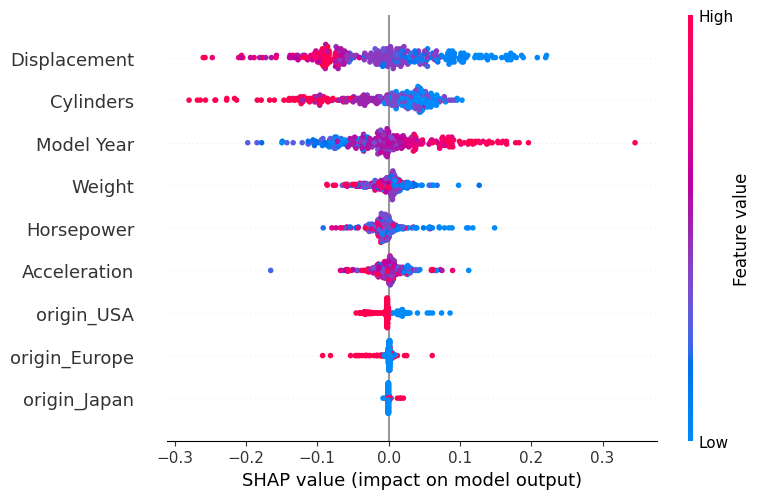

In [565]:
explainer = shap.Explainer(regression_tree, X_train)
shap_values = explainer(X_train)
# Visualize the summary plot
shap.summary_plot(shap_values, X_train)

In [566]:
# The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction.
# The SHAP explanation method computes Shapley values from coalitional game theory.
# The feature values of a data instance act as players in a coalition.
#  Shapley values tell us how to fairly distribute the “payout” (= the prediction) among the features  (source: https://christophm.github.io/interpretable-ml-book/shap.html)


# We can see that the Shap Value ranges for Displacement, Cylinder and Model Year are greatest. Therefore they

#Blue is the value of y at the low end, red is the high end.
# for example, we can se that when the Cylinders are greater than the y (MPG) is lower

# We will choose the first 3 cars
X_val.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,origin_Europe,origin_Japan,origin_USA
198,0.2,0.059432,0.039106,0.053783,0.566265,0.500000,0,0,1
396,0.2,0.134367,0.330219,0.299054,0.638554,1.000000,0,0,1
33,0.6,0.423773,0.330219,0.301714,0.458957,0.083333,0,0,1
208,1.0,0.645995,0.581006,0.687648,0.313253,0.500000,0,0,1
93,1.0,0.645995,0.581006,0.775414,0.391566,0.250000,0,0,1


In [567]:
y_pred = pd.DataFrame(y_pred)
## get first 3 rows of predictiopns(first 3 cars)
y_pred.head(3)
# Car 1: Prediction Rate: 0.718 which is high, we have a low amount of cylinders (2), low displacement and low horsepower and medium model year. Therefore it is very reasonable for our prediction to the actual MPG to be accurate.
# Car 2: Prediction Rate: 0.478 which is not that high, we have a low amount of cylinders (2), low displacement and noticeably higher HP than 1 and lohighw model year. Some of these features do not align in a single direction therefore it is harder to predict.
# Car 3: Prediction Rate: 0.186 which is very low, we have a low amount of cylinders (2), low displacement and noticeably higher HP than 1 and lohighw model year. Some of these features do not align in a single direction therefore it is harder to predict.

,0
0,0.718085
1,0.478723
2,0.186170


## 2. Classification evaluation (15 points)

Submit question 2 as a PDF file with the calculations, graphs and explainations.

### ROC and precision recall curve (8 pts)

Calculate ROC curve and precision recall curve with the follwing tresholds: [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
The probabilities are:

| label | classifier 1 | classifier 2|
|--------|----------|---------------|
|1|0.41|1.00|
|0	|0.00	|0.72
|0	|0.00	|0.99
|1	|0.73	|0.14
|0	|0.62	|0.00
|1	|1.00	|0.94
|0	|1.00	|0.10
|1	|0.14	|0.77
|0	|0.00	|0.02
|1	|0.55	|1.00






Answer the following questions:
1. Which model is better based on those graphs?
2. If those models predict heart attack, choose a 'one threshold' metric (such as acc, precision, etc..) and explain why it's a suitable metric for this case.

### Curves differences (7 pts)

Create a new table with two columns: 'label' and 'predictions'. Fill the table with 10 rows of values representing binary labels and corresponding predicted probabilities.
Ensure that the values chosen for the predictions are deliberately selected to make the ROC curve and precision-recall curve look different - which means that according to one curve the model is good, and according to the second one it's bad.
After filling the table, draw both the ROC curve and precision-recall curve using the provided data.
Explain the values that you chose and the reason for the change.

## 3. Ensembel (40 pts)

### implement adaBoost (25 pts)
implement the adaboost algorithm from scratch, refer to the lecture slides for the algorithm 43.
you may add any helper functions if needed but make sure to add documentation if you do so.
note, the base_estimator in sklearn supports sample_weight, you may use it if you want to.

In [568]:


# Suppressing warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Implement Adaboost
class AdaBoost:
    def __init__(self, n_estimators=50, base_estimator=None):
        self.n_estimators = n_estimators
        self.base_estimator = base_estimator
        self.estimators_ = []
        self.alphas_ = []

    def fit(self, X, y):
        n_samples = len(X)
        weights = np.ones(n_samples) / n_samples
        self.estimators_ = []
        self.alphas_ = []

        for _ in range(self.n_estimators):
            estimator = self.base_estimator
            estimator.fit(X, y, sample_weight=weights)
            predictions = estimator.predict(X)

            error = np.sum(weights * (predictions != y))

            alpha = 0.5 * np.log((1 - error) / (error + 1e-10))
            weights *= np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)

            self.estimators_.append(estimator)
            self.alphas_.append(alpha)

    def predict(self, X):
        preds = np.zeros(len(X))
        for estimator, alpha in zip(self.estimators_, self.alphas_):
            preds += alpha * estimator.predict(X)
        return np.sign(preds)


### Model training
train the adaboost model using the synthetic data below, use the following base estimators n_estimators=3,5,10:
1. DecisionTreeClassifier with max_depth=1
2. DecisionTreeClassifier with max_depth=3
3. svm.SVC with kernel='linear'


In [569]:
# Model training
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

base_estimators = [
    DecisionTreeClassifier(max_depth=1),
    DecisionTreeClassifier(max_depth=3),
    svm.SVC(kernel='linear')
]

n_estimators = [3, 5, 10]


### Model comparison (5 pts)
compare the models using the following metrics:
1. accuracy
2. precision

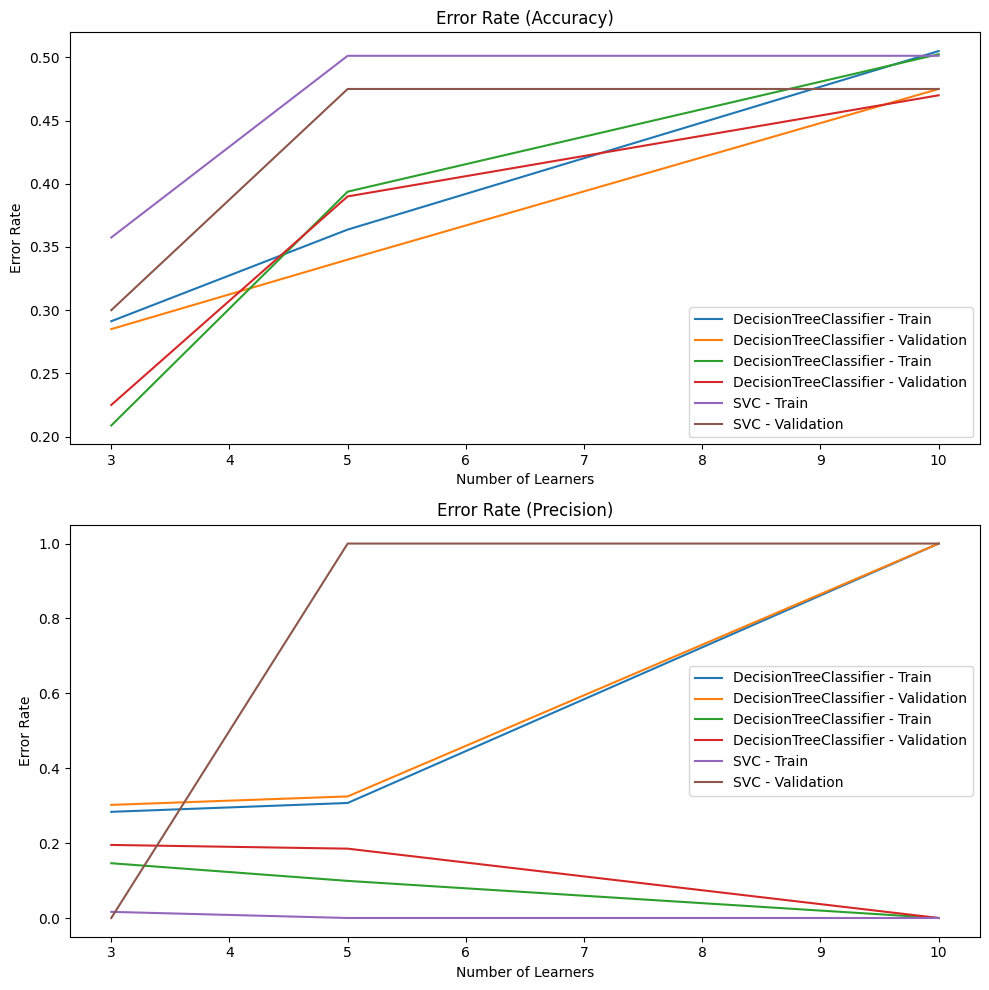

In [570]:
def compare_models(X_train, y_train, X_val, y_val, base_estimators, n_estimators):
    accuracies = []
    precisions = []

    for estimator in base_estimators:
        accuracy_scores = []
        precision_scores = []

        for n in n_estimators:
            model = AdaBoost(n_estimators=n, base_estimator=estimator)
            model.fit(X_train, y_train)
            y_pred_train = model.predict(X_train)
            y_pred_val = model.predict(X_val)

            accuracy_train = accuracy_score(y_train, y_pred_train)
            precision_train = precision_score(y_train, y_pred_train)

            accuracy_val = accuracy_score(y_val, y_pred_val)
            precision_val = precision_score(y_val, y_pred_val)

            accuracy_scores.append((accuracy_train, accuracy_val))
            precision_scores.append((precision_train, precision_val))

        accuracies.append(accuracy_scores)
        precisions.append(precision_scores)

    return accuracies, precisions

def plot_error_rates(accuracies, precisions, base_estimators, n_estimators):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    for i, estimator in enumerate(base_estimators):
        accuracy_train, accuracy_val = zip(*accuracies[i])
        precision_train, precision_val = zip(*precisions[i])

        axs[0].plot(n_estimators, 1 - np.array(accuracy_train), label=f'{estimator.__class__.__name__} - Train')
        axs[0].plot(n_estimators, 1 - np.array(accuracy_val), label=f'{estimator.__class__.__name__} - Validation')

        axs[1].plot(n_estimators, 1 - np.array(precision_train), label=f'{estimator.__class__.__name__} - Train')
        axs[1].plot(n_estimators, 1 - np.array(precision_val), label=f'{estimator.__class__.__name__} - Validation')

    axs[0].set_title('Error Rate (Accuracy)')
    axs[0].set_xlabel('Number of Learners')
    axs[0].set_ylabel('Error Rate')
    axs[0].legend()

    axs[1].set_title('Error Rate (Precision)')
    axs[1].set_xlabel('Number of Learners')
    axs[1].set_ylabel('Error Rate')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

# Model comparison
accuracies, precisions = compare_models(X_train, y_train, X_val, y_val, base_estimators, n_estimators)
plot_error_rates(accuracies, precisions, base_estimators, n_estimators)


### compare number of learners (10 pts)
Choose the best base estimator from the previous section.
Compare the effect of the number of learners on the models error on both the training set and validation set.
use n_estimators = [1,5,10,20,50,100] and plot the error rate for each number of learners.
discuss the results.

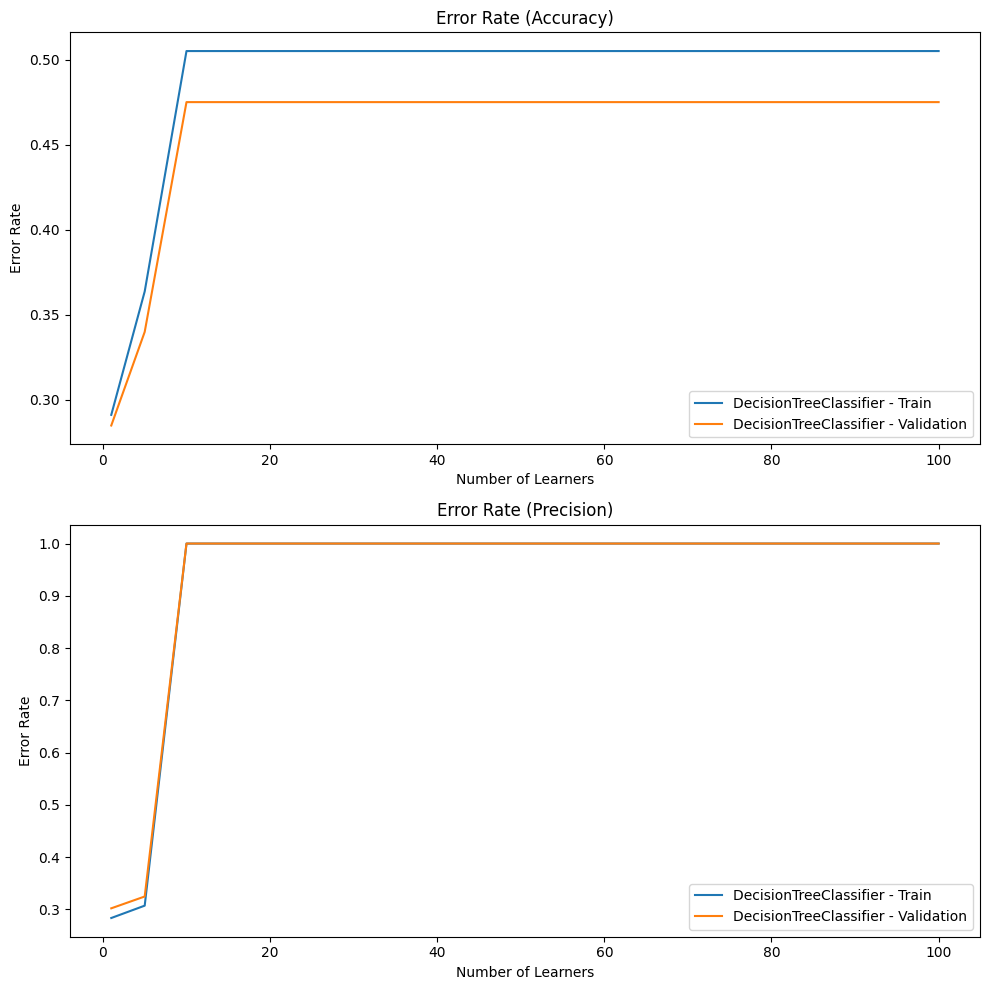

In [571]:
# Compare number of learners
base_estimator = DecisionTreeClassifier(max_depth=1)  # Choosing the best base estimator
n_estimators = [1, 5, 10, 20, 50, 100]

accuracies, precisions = compare_models(X_train, y_train, X_val, y_val, [base_estimator], n_estimators)
plot_error_rates(accuracies, precisions, [base_estimator], n_estimators)


## 4. SVM (10 points)

Submit question 4 in the pdf file.

### Find the SVM formula (6 pts)

Given the following points find and draw the SVM formula (hyperplane formula):

| x1 | x2 | class|
|--------|----------|---------------|
|1|6|-|
|1	|10	|-
|4	|11	|-
|6	|1	|+
|7	|6	|+
|10	|4	|+

### Margin size (4 pts)

Based on the hyperplane, calculate the margin size.